# Common Neighbor Rule in PyC Subgraph

### Downloading data
Uncomment and run the cell below if you'd like to run the cells below

In [1]:
#! bash downloadData.sh

In [2]:
import os
import random
from time import time
import pandas as pd
import numpy as np
import networkx as nx

from utils.graph_creation import *
from utils.common_neighbor_rule import *
from utils.visualization import *
from utils.fileio import *

## Create PyC Subgraph

In [3]:
# fetch and preview the synapses table
pcy_synapses = read_pyc_graph("data/pyc_graph_v185.csv")
pcy_synapses.head()

,segmentation,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,spine_vol,exclude_conn
0,185,1484,1,"[91332, 57836, 1584]",97170491155950710,648518346349539437,"[91369, 57798, 1582]","[91332, 57748, 1584]",97170491155951077,648518346349531254,798,0.133004,0
1,185,2254,1,"[64762, 45414, 711]",89838917557174822,648518346349537978,"[64742, 45419, 708]","[64720, 45430, 708]",89838917557173796,648518346349537300,129,0.016346,0
2,185,3785,1,"[69646, 63086, 721]",91264984138384361,648518346349533058,"[69604, 63106, 721]","[69558, 63120, 721]",90983509161691227,648518346349538715,62,0.020969,0
3,185,3863,1,"[66776, 39946, 1138]",90396382837344883,648518346349539333,"[66750, 39982, 1139]","[66722, 39990, 1139]",90396382837366381,648518346349539806,62,0.018033,0
4,185,4062,1,"[89112, 48970, 2154]",96597662777759466,648518346349523975,"[89162, 48958, 2154]","[89198, 48936, 2154]",96597662777759456,648518346349537716,62,0.008805,0


In [4]:
pcy_synapses = format_synapses(pcy_synapses)

# create the simple directed graph (no self-loops, no multi-edges)
# treat multiple synapses as one connection
pyc_subgraph = synapses_to_connections(pcy_synapses[['pre','post']])
# remove self-loops
g_actual = remove_autapses(edges_to_graph(pyc_subgraph))

In [5]:
print(nx.info(g_actual))

Name: 
Type: DiGraph
Number of nodes: 334
Number of edges: 1738
Average in degree:   5.2036
Average out degree:   5.2036


## Common Neighbor Rule

In [6]:
%%time
# calculate common neighbor stats in the observation
obs_cnr_stats = get_cnr_stats(g_actual)

CPU times: user 8.33 s, sys: 4 ms, total: 8.34 s
Wall time: 8.34 s


- "undir_pair" - number of pairs with [bin] common neighbor
- "dir_spair" - number of pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_ppair" - number of pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_conn" - number of connected pairs with [bin] common neighbor
- "dir_sconn" - number of connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_pconn" - number of connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_uni_sconn" - number of unidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_uni_pconn" - number of unidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_bi_sconn" - number of bidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_bi_pconn" - number of bidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_perc" - percentage of pairs with [bin] common neighbor to be connected
- "dir_sperc" - percentage of pairs with [bin] strict common successor to be connected
- "dir_pperc" - percentage of pairs with [bin] strict common predcessor to be connected

In [7]:
obs_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,34324.0,52856.0,39977.0,458.0,1280.0,963.0,1270.0,945.0,10.0,18.0,0.013343,0.024217,0.024089
1,13313.0,1416.0,12189.0,434.0,162.0,526.0,154.0,516.0,8.0,10.0,0.032600,0.114407,0.043154
2,4510.0,714.0,2683.0,310.0,117.0,154.0,109.0,152.0,8.0,2.0,0.068736,0.163866,0.057398
3,1793.0,318.0,618.0,180.0,69.0,49.0,64.0,48.0,5.0,1.0,0.100390,0.216981,0.079288
4,801.0,142.0,117.0,132.0,26.0,11.0,26.0,11.0,0.0,0.0,0.164794,0.183099,0.094017
5,402.0,68.0,22.0,74.0,13.0,4.0,13.0,4.0,0.0,0.0,0.184080,0.191176,0.181818
6,182.0,39.0,5.0,37.0,18.0,0.0,18.0,0.0,0.0,0.0,0.203297,0.461538,0.000000
7,119.0,25.0,0.0,18.0,8.0,0.0,8.0,0.0,0.0,0.0,0.151261,0.320000,0.000000
8,63.0,14.0,0.0,22.0,7.0,0.0,7.0,0.0,0.0,0.0,0.349206,0.500000,0.000000
9,104.0,19.0,0.0,42.0,7.0,0.0,7.0,0.0,0.0,0.0,0.403846,0.368421,0.000000


In [8]:
%%time
s=100 # total 100 samples (100 continous samples)
cfg_cnr_samples = continuous_sample_cnr(g_actual, samples=s, niters=int(1e4))


CPU times: user 15min 12s, sys: 312 ms, total: 15min 13s
Wall time: 15min 20s


In [9]:
cfg_cnr_stats, cfg_cnr_stats_std = cnr_mean_std(cfg_cnr_samples)

In [10]:
cfg_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,33950.73,52812.88,39782.66,494.01,1297.05,1024.57,1291.48,1012.37,5.57,12.20,0.014551,0.024559,0.025754
1,13567.39,1450.10,12430.31,451.57,179.55,496.82,173.73,489.63,5.82,7.19,0.033282,0.123826,0.039971
2,4623.31,711.85,2706.89,305.65,108.20,149.38,104.05,147.20,4.15,2.18,0.066103,0.151944,0.055169
3,1828.13,327.36,554.28,188.99,58.02,35.94,55.36,35.41,2.66,0.53,0.103390,0.177300,0.064787
4,812.38,152.16,111.06,111.86,32.11,7.36,30.49,7.21,1.62,0.15,0.137651,0.211151,0.065865
5,394.50,72.88,21.15,67.17,17.05,1.41,16.09,1.39,0.96,0.02,0.170085,0.233318,0.064401
6,199.88,37.25,3.64,38.28,9.87,0.21,9.19,0.21,0.68,0.00,0.191332,0.265363,0.060333
7,103.03,20.15,0.90,22.55,5.55,0.04,5.26,0.04,0.29,0.00,0.219214,0.274678,0.035000
8,56.59,11.17,0.11,14.22,3.42,0.00,3.27,0.00,0.15,0.00,0.250087,0.305641,0.000000
9,75.06,15.20,0.00,21.43,4.91,0.00,4.54,0.00,0.37,0.00,0.283369,0.329488,0.000000


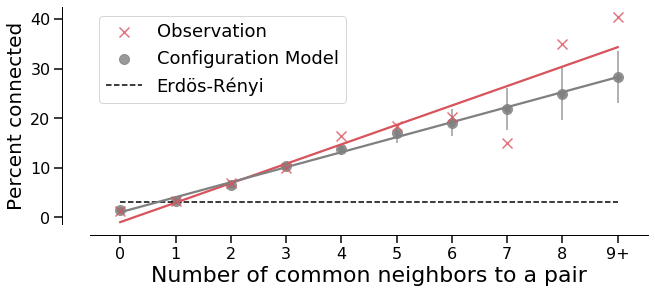

In [11]:
E, N = len(g_actual.edges), len(g_actual.nodes)
ER_p_null = (1 - E / (N*(N-1)))**2

plot_cnr(obs_cnr_stats, cfg_cnr_stats, cfg_cnr_stats_std, ER_p_null, figsize=(10,4), fname="cnr")

In [12]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), obs_cnr_stats["undir_perc"])

(0.8637575765406493, 9.983128500788891e-05)

In [13]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), cfg_cnr_stats["undir_perc"])

(0.9970641605372242, 2.0337517288179404e-11)